In [1]:

import sklearn
import numpy as np
import pandas as pd
import plotly as plot   
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf   
import matplotlib.pyplot as plt
import seaborn as sns      
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df=pd.read_csv(r'C:\Users\Yash\Documents\Jupyter notebook\heart.csv')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [6]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [8]:
df.shape

(303, 14)

In [9]:
df.size

4242

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
#Visualization

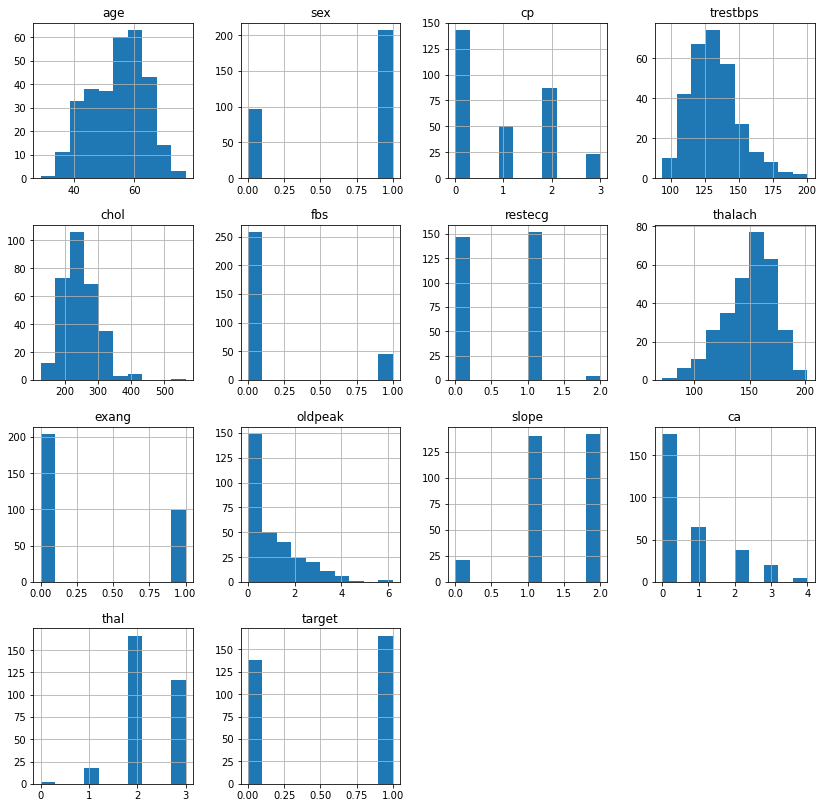

In [13]:
df.hist(figsize=(14,14))
plt.show()

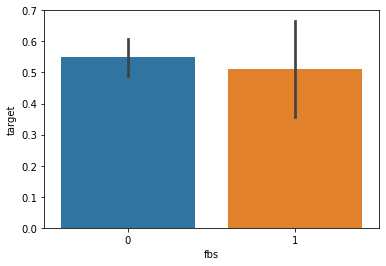

In [14]:
sns.barplot(x="fbs", y="target", data=df)
plt.show()

<AxesSubplot:xlabel='sex', ylabel='age'>

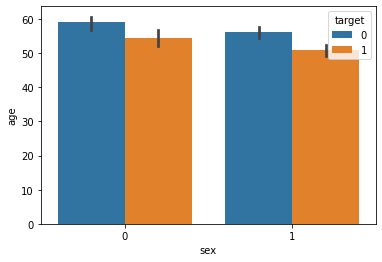

In [15]:
sns.barplot(x=df['sex'],y=df['age'],hue=df['target'])

In [16]:
px.bar(df,df['sex'],df['target'])

In [17]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']

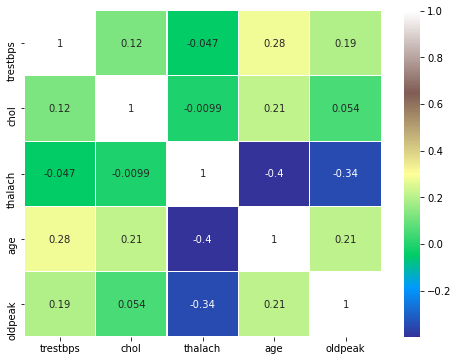

In [18]:
# create a correlation heatmap
sns.heatmap(df[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Yash\anaconda3\lib\site-package

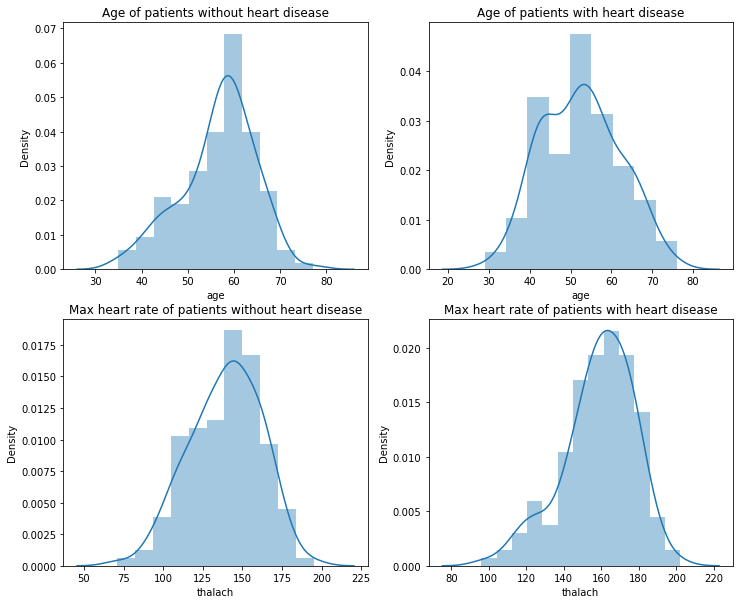

In [19]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

In [20]:
#DATA Preprocessing

In [21]:
X,y=df.loc[:,:'thal'],df['target']

In [22]:
X.drop('fbs',axis=1,inplace=True)

In [23]:
X

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,0,150,0,2.3,0,0,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,172,0,1.4,2,0,2
3,56,1,1,120,236,1,178,0,0.8,2,0,2
4,57,0,0,120,354,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,1,123,1,0.2,1,0,3
299,45,1,3,110,264,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,141,0,3.4,1,2,3
301,57,1,0,130,131,1,115,1,1.2,1,1,3


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler().fit(X)
X_std=std.transform(X)

In [26]:
X

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,0,150,0,2.3,0,0,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,172,0,1.4,2,0,2
3,56,1,1,120,236,1,178,0,0.8,2,0,2
4,57,0,0,120,354,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,1,123,1,0.2,1,0,3
299,45,1,3,110,264,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,141,0,3.4,1,2,3
301,57,1,0,130,131,1,115,1,1.2,1,1,3


In [27]:
X_std[0]

array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
       -1.00583187,  0.01544279, -0.69663055,  1.08733806, -2.27457861,
       -0.71442887, -2.14887271])

In [28]:
df.shape

(303, 14)

In [29]:
X.shape

(303, 12)

In [30]:
X.size

3636

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train_std,X_test_std,y_train,y_test=train_test_split(X_std,y,random_state=10,test_size=0.3,shuffle=True)

In [33]:
X_train_std.shape

(212, 12)

In [34]:
X_train_std

array([[-0.15069166, -1.46841752, -0.93851463, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [-0.7021358 ,  0.68100522,  0.03203122, ..., -2.27457861,
        -0.71442887,  1.12302895],
       [ 0.18017482, -1.46841752, -0.93851463, ..., -2.27457861,
         1.24459328,  1.12302895],
       ...,
       [-0.48155814, -1.46841752,  1.00257707, ..., -0.64911323,
        -0.71442887, -0.51292188],
       [-2.24617937, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 1.28306308,  0.68100522, -0.93851463, ...,  0.97635214,
         0.26508221, -0.51292188]])

In [35]:
X_test

NameError: name 'X_test' is not defined

In [ ]:
X_test_std.shape

In [ ]:
y.size

In [36]:
y_train.size

212

In [37]:
y_test.size

91

In [38]:
# Decision Tree Classifier

In [39]:
X,y=df.loc[:,:'thal'],df['target']

In [40]:
X.drop('fbs',axis=1,inplace=True)

In [41]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [42]:
X.size

3636

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [45]:
X_train.shape

(212, 12)

In [46]:
X_test.shape

(91, 12)

In [47]:
y_test.size

91

In [48]:
X_test.drop('fbs',axis=1,inplace=True)

KeyError: "['fbs'] not found in axis"

In [49]:
X_test

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,165,0,2.5,1,1,3
229,64,1,2,125,309,1,131,1,1.8,1,0,3
126,47,1,0,112,204,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,1,163,0,0.0,2,0,2
21,44,1,2,130,233,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,184,0,0.0,2,0,2


In [50]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
X_test

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,165,0,2.5,1,1,3
229,64,1,2,125,309,1,131,1,1.8,1,0,3
126,47,1,0,112,204,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,1,163,0,0.0,2,0,2
21,44,1,2,130,233,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,184,0,0.0,2,0,2


In [52]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [53]:
prediction=dt.predict(X_test)

In [54]:
prediction

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [55]:
accuracy_dt=accuracy_score(y_test,prediction)*90

In [56]:
accuracy_dt

67.25274725274726

In [57]:
dt.feature_importances_

array([0.04853211, 0.04391232, 0.33363884, 0.10336641, 0.07422397,
       0.0129521 , 0.08913377, 0.06667809, 0.04480355, 0.07300416,
       0.10975468, 0.        ])

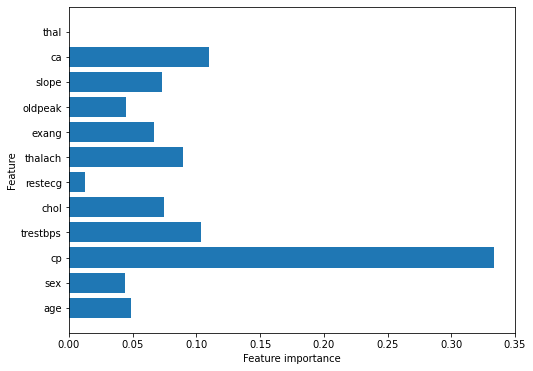

In [58]:
def plot_feature_importances(model):
    plt.figure(figsize=(8,6))
    n_features = 12
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)
plot_feature_importances(dt)
plt.savefig('feature_importance')

In [59]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [60]:
Catagory=['No you dont have Heart Disease','Yes you have Heart Disease']

In [61]:
custom_data_dt=np.array([[63,1,3,145,233,0,150,0,2.3,0,0,1]])

In [62]:
custom_data_prediction_dt=dt.predict(custom_data_dt)

In [63]:
custom_data_prediction_dt

array([1], dtype=int64)

In [64]:
int(custom_data_prediction_dt)

1

In [65]:
print(Catagory[int(custom_data_prediction_dt)])

Yes you have Heart Disease


In [66]:
# KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_std,y_train)

KNeighborsClassifier(n_neighbors=8)

In [68]:
X_test_std

array([[ 0.18017482, -1.46841752, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.40075247,  0.68100522,  1.00257707, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 1.06248543,  0.68100522,  1.00257707, ..., -0.64911323,
        -0.71442887,  1.12302895],
       ...,
       [ 0.29046364,  0.68100522,  1.00257707, ..., -0.64911323,
         0.26508221,  1.12302895],
       [-0.26098049,  0.68100522,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 0.62133012,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895]])

In [69]:
prediction_knn=knn.predict(X_test_std)

In [70]:
accuracy_knn=accuracy_score(y_test,prediction)*100

In [71]:
accuracy_knn

74.72527472527473

In [72]:
custom_data_knn=np.array([[63,1,3,145,233,0,150,0,2.3,0,0,1]])

In [73]:
custom_data_knn_std=std.transform(custom_data_knn)

In [74]:
custom_data_knn_std

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        -1.00583187,  0.01544279, -0.69663055,  1.08733806, -2.27457861,
        -0.71442887, -2.14887271]])

In [75]:
custom_data_prediction_knn=knn.predict(custom_data_knn_std)

In [76]:
custom_data_prediction_knn

array([0], dtype=int64)

In [77]:
print(Catagory[int(custom_data_prediction_dt)])

Yes you have Heart Disease


In [78]:
k_range=range(1,26)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 6 with score : 0.6813186813186813


In [79]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [80]:
scores_list

[0.6373626373626373,
 0.6043956043956044,
 0.5934065934065934,
 0.6703296703296703,
 0.6373626373626373,
 0.6813186813186813,
 0.6483516483516484,
 0.6593406593406593,
 0.6153846153846154,
 0.6483516483516484,
 0.6153846153846154,
 0.6043956043956044,
 0.5824175824175825,
 0.5824175824175825,
 0.6373626373626373,
 0.6593406593406593,
 0.6153846153846154,
 0.6373626373626373,
 0.6043956043956044,
 0.6373626373626373,
 0.6483516483516484,
 0.6593406593406593,
 0.6483516483516484,
 0.6483516483516484,
 0.6153846153846154]

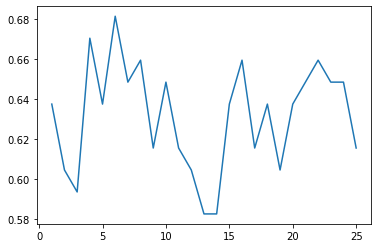

In [81]:
plt.plot(k_range,scores_list)

In [82]:
px.line(x=k_range,y=scores_list)

In [83]:
algorithm=['Decision Tree','KNN']
scores=[accuracy_dt,accuracy_knn]


C:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

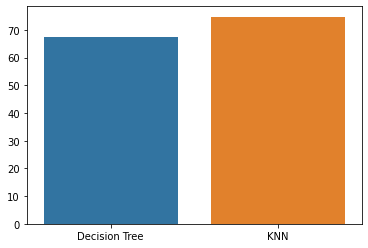

In [84]:
sns.barplot(algorithm,scores)